In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# load data
attrition = pd.read_csv('/content/drive/MyDrive/shared/UseCase_3/sonny/attrition_churns.csv')
print(attrition.shape)
attrition.head()

(29745, 12)


,New_ID,Month,Txn,Status,FUA,Services,Has_Payroll,Has_Investment,Has_VISA,Age,Beacon score,churn_next_month
0,pss5916357k,201801,40.0,Active,72644.0,6.0,1,0.0,0.0,23.0,676.0,0
1,pss5916357k,201802,30.0,Active,73070.0,6.0,1,0.0,0.0,23.0,676.0,0
2,pss5916357k,201803,20.0,Active,73653.0,6.0,1,0.0,0.0,23.0,676.0,0
3,pss5916357k,201804,25.0,Active,74305.0,6.0,1,0.0,0.0,23.0,676.0,0
4,pss5916357k,201805,36.0,Active,74468.0,6.0,1,0.0,0.0,23.0,676.0,0


In [ ]:
# Create 'time' feature which takes the Month == "201801" as 1, and so on
attrition4 = attrition.copy()

attrition4['time_string'] = attrition4['Month'].astype(str)
attrition4['year'] = attrition4['time_string'].str.slice(start=0, stop=4).astype(int)
attrition4['month_int'] = attrition4['time_string'].str.slice(start=4, stop=6).astype(int)
attrition4['time'] = (attrition4['year'] - 2018) * 12 + attrition4['month_int']

# drop Month, time_string, year, month_int
attrition4 = attrition4.drop(columns=['Month', 'time_string', 'year', 'month_int'])

# exclude those with FUA > 0.35e6 (outliers?)
attrition4 = attrition4.loc[(attrition4['FUA'] < 0.35e6)]
attrition4 = attrition4.loc[(attrition4['FUA'] >= 0)]

# create delta features: value at time t - value at time t-1
# attrition4["FUA_delta"] = attrition4.groupby("New_ID")["FUA"].diff() / 1000
# attrition4["FUA_delta"].fillna(0, inplace=True)

# attrition4["Txn_delta"] = attrition4.groupby("New_ID")["Txn"].diff()
# attrition4["Txn_delta"].fillna(0, inplace=True)

attrition4["FUA_delta"] = attrition4.groupby("New_ID")["FUA"].pct_change() * 100  # percentage change
attrition4["Txn_delta"] = attrition4.groupby("New_ID")["Txn"].pct_change() * 100  # percentage change
# attrition4["Txn_delta_pct"].fillna(0, inplace=True)


attrition4["Services_delta"] = attrition4.groupby("New_ID")["Services"].diff()
attrition4["Services_delta"].fillna(0, inplace=True)

attrition4["Has_Payroll_delta"] = attrition4.groupby("New_ID")["Has_Payroll"].diff()
attrition4["Has_Payroll_delta"].fillna(0, inplace=True)

attrition4["Has_Investment_delta"] = attrition4.groupby("New_ID")["Has_Investment"].diff()
attrition4["Has_Investment_delta"].fillna(0, inplace=True)

attrition4["Has_VISA_delta"] = attrition4.groupby("New_ID")["Has_VISA"].diff()
attrition4["Has_VISA_delta"].fillna(0, inplace=True)

attrition4["Beacon_Score_delta"] = attrition4.groupby("New_ID")["Beacon score"].diff()
attrition4["Beacon_Score_delta"].fillna(0, inplace=True)

# split the Age into groups
attrition4['Age_group'] = pd.cut(attrition4['Age'], bins=[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100], labels=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
# Age_group as numeric
attrition4['Age_group'] = attrition4['Age_group'].astype(int)

# drop NaNs: automatically drop the first row of each New_ID
attrition4 = attrition4.dropna().reset_index(drop=True)
# remove all rows that have NaNs, -inf, inf
attrition4 = attrition4[~attrition4.isin([np.nan, np.inf, -np.inf]).any(1)].reset_index(drop=True)

display(attrition4.head())

<ipython-input-6-702e7a852e32>:51: FutureWarning: In a future version of pandas all arguments of DataFrame.any and Series.any will be keyword-only.
  attrition4 = attrition4[~attrition4.isin([np.nan, np.inf, -np.inf]).any(1)].reset_index(drop=True)


,New_ID,Txn,Status,FUA,Services,Has_Payroll,Has_Investment,Has_VISA,Age,Beacon score,churn_next_month,time,FUA_delta,Txn_delta,Services_delta,Has_Payroll_delta,Has_Investment_delta,Has_VISA_delta,Beacon_Score_delta,Age_group
0,pss5916357k,30.0,Active,73070.0,6.0,1,0.0,0.0,23.0,676.0,0,2,0.586421,-25.000000,0.0,0.0,0.0,0.0,0.0,2
1,pss5916357k,20.0,Active,73653.0,6.0,1,0.0,0.0,23.0,676.0,0,3,0.797865,-33.333333,0.0,0.0,0.0,0.0,0.0,2
2,pss5916357k,25.0,Active,74305.0,6.0,1,0.0,0.0,23.0,676.0,0,4,0.885232,25.000000,0.0,0.0,0.0,0.0,0.0,2
3,pss5916357k,36.0,Active,74468.0,6.0,1,0.0,0.0,23.0,676.0,0,5,0.219366,44.000000,0.0,0.0,0.0,0.0,0.0,2
4,pss5916357k,25.0,Active,22059.0,6.0,0,0.0,0.0,23.0,676.0,1,6,-70.377880,-30.555556,0.0,-1.0,0.0,0.0,0.0,2


In [ ]:
attrition4.describe()

,Txn,FUA,Services,Has_Payroll,Has_Investment,Has_VISA,Age,Beacon score,churn_next_month,time,FUA_delta,Txn_delta,Services_delta,Has_Payroll_delta,Has_Investment_delta,Has_VISA_delta,Beacon_Score_delta,Age_group
count,28119.000000,28119.000000,28119.000000,28119.000000,28119.000000,28119.000000,28119.000000,28119.000000,28119.000000,28119.000000,28119.000000,28119.000000,28119.000000,28119.000000,28119.0,28119.0,28119.0,28119.000000
mean,31.964792,82777.139246,5.422881,0.901917,0.457698,0.484797,42.598528,684.078346,0.057826,11.792347,-0.696129,2.191365,-0.004908,-0.052705,0.0,0.0,0.0,3.718767
std,8.277616,45261.049341,1.776595,0.297432,0.498216,0.499778,13.644528,78.306001,0.233418,7.235102,22.557961,37.763728,0.154055,0.223447,0.0,0.0,0.0,1.404979
min,1.000000,1576.400000,1.000000,0.000000,0.000000,0.000000,19.000000,550.000000,0.000000,2.000000,-98.421577,-80.000000,-6.000000,-1.000000,0.0,0.0,0.0,1.000000
25%,25.000000,43878.000000,4.000000,1.000000,0.000000,0.000000,30.000000,615.000000,0.000000,6.000000,0.272204,-28.571429,0.000000,0.000000,0.0,0.0,0.0,2.000000
50%,32.000000,79336.000000,5.000000,1.000000,0.000000,0.000000,43.000000,685.000000,0.000000,11.000000,0.574029,-2.631579,0.000000,0.000000,0.0,0.0,0.0,4.000000
75%,38.000000,121110.000000,7.000000,1.000000,1.000000,1.000000,54.000000,751.000000,0.000000,17.000000,1.105787,28.000000,0.000000,0.000000,0.0,0.0,0.0,5.000000
max,54.000000,174472.000000,8.000000,1.000000,1.000000,1.000000,67.000000,820.000000,1.000000,46.000000,864.240868,158.333333,2.000000,0.000000,0.0,0.0,0.0,6.000000


In [ ]:
attrition_rf = attrition4[["FUA_delta", "Txn_delta", "Has_Payroll_delta", "churn_next_month","Age_group", "time", "Services", "Beacon score"]]

display(attrition_rf.head(6))

,FUA_delta,Txn_delta,Has_Payroll_delta,churn_next_month,Age_group,time,Services,Beacon score
0,0.586421,-25.000000,0.0,0,2,2,6.0,676.0
1,0.797865,-33.333333,0.0,0,2,3,6.0,676.0
2,0.885232,25.000000,0.0,0,2,4,6.0,676.0
3,0.219366,44.000000,0.0,0,2,5,6.0,676.0
4,-70.377880,-30.555556,-1.0,1,2,6,6.0,676.0
5,0.600843,-25.000000,0.0,0,6,2,8.0,583.0


In [ ]:
# attrition_rf['Services_delta'] = attrition_rf['Services_delta'].astype(int)
attrition_rf['Has_Payroll_delta'] = attrition_rf['Has_Payroll_delta'].astype(int)
attrition_rf['churn_next_month'] = attrition_rf['churn_next_month'].astype(int)

<ipython-input-9-14a2cf518e79>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  attrition_rf['Has_Payroll_delta'] = attrition_rf['Has_Payroll_delta'].astype(int)
<ipython-input-9-14a2cf518e79>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  attrition_rf['churn_next_month'] = attrition_rf['churn_next_month'].astype(int)


array([[<Axes: title={'center': 'FUA_delta'}>,
        <Axes: title={'center': 'Txn_delta'}>,
        <Axes: title={'center': 'Has_Payroll_delta'}>],
       [<Axes: title={'center': 'churn_next_month'}>,
        <Axes: title={'center': 'Age_group'}>,
        <Axes: title={'center': 'time'}>],
       [<Axes: title={'center': 'Services'}>,
        <Axes: title={'center': 'Beacon score'}>, <Axes: >]], dtype=object)

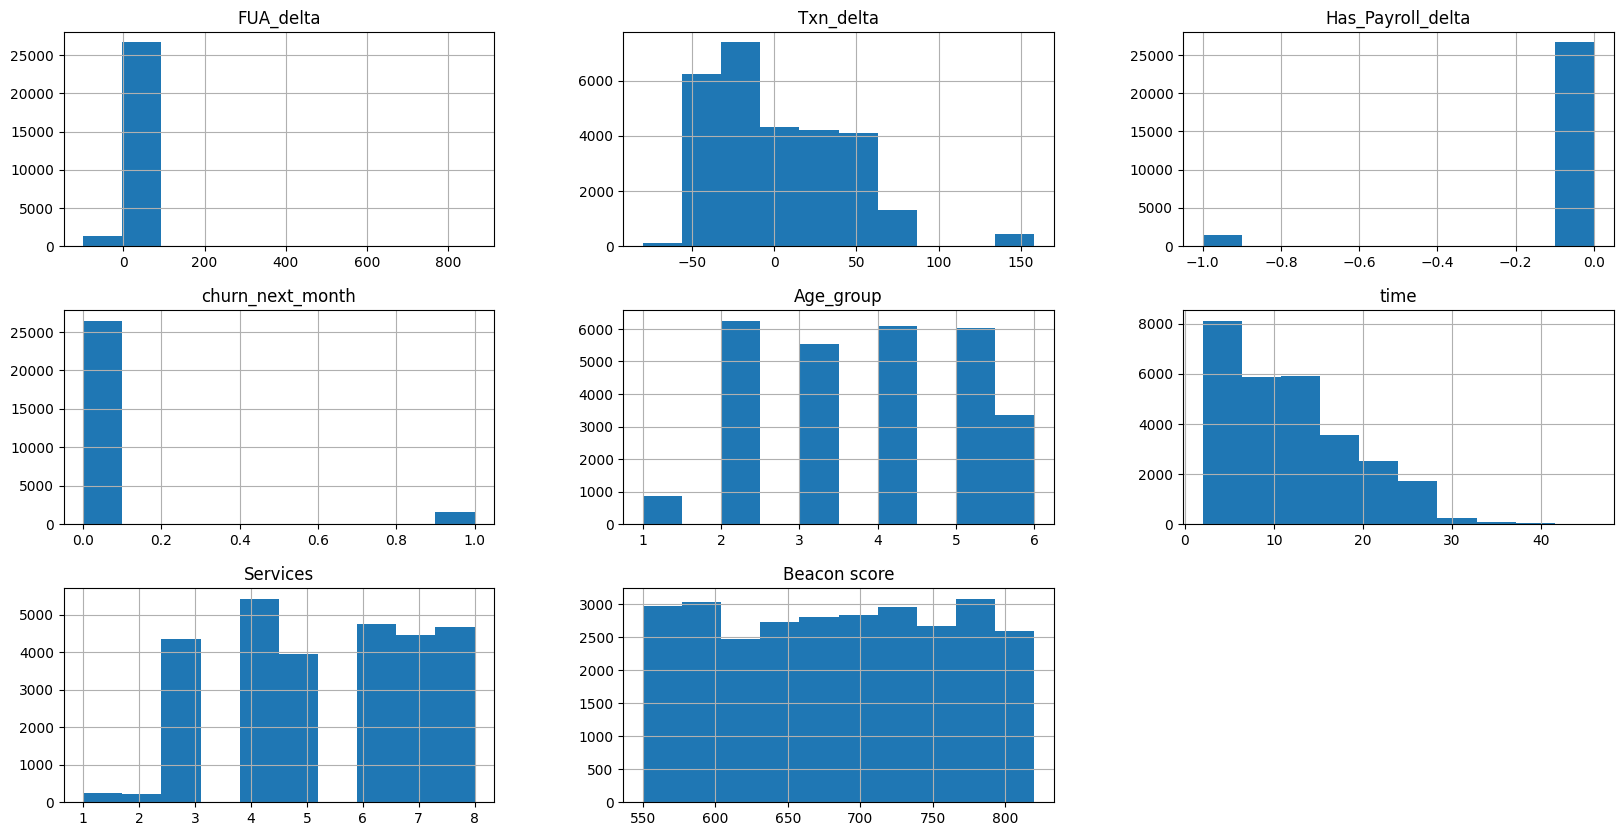

In [ ]:
# histogram of each feature
attrition_rf.hist(figsize=(20, 10))

In [ ]:
display(attrition_rf['churn_next_month'].value_counts())
display(attrition_rf['Has_Payroll_delta'].value_counts())
# display(attrition_rf['Services_delta'].value_counts())

0    26493
1     1626
Name: churn_next_month, dtype: int64

 0    26637
-1     1482
Name: Has_Payroll_delta, dtype: int64

In [ ]:
n_churn = attrition_rf['churn_next_month'].value_counts()[1]

# randomly sample n_churn from the non-churn group
attrition_rf_0 = attrition_rf[attrition_rf['churn_next_month'] == 0]
attrition_rf_1 = attrition_rf[attrition_rf['churn_next_month'] == 1]

attrition_rf_0_sample = attrition_rf_0.sample(int(1.5*n_churn), random_state=42, replace=False)

attrition_rf2 = pd.concat([attrition_rf_0_sample, attrition_rf_1], axis=0).reset_index(drop=True)
attrition_rf2.shape
# attrition_rf2 = attrition_rf.copy()

(4065, 8)

F1 score: 0.9969230769230769
Recall: 0.9959016393442623
Precision: 0.997946611909651


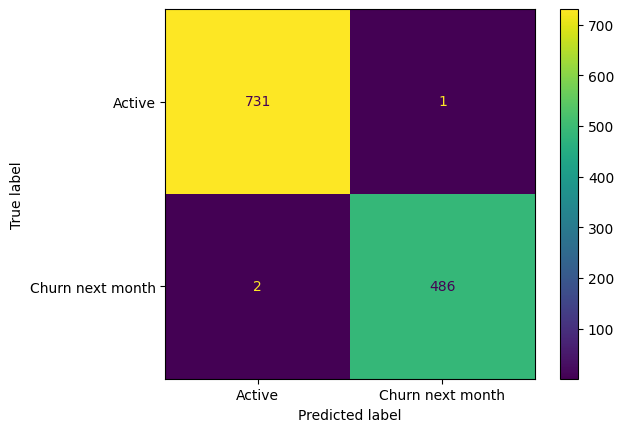

In [ ]:
# weighted lightgbm

# train-test split
from sklearn.model_selection import train_test_split

X = attrition_rf2.drop("churn_next_month", axis=1)
y = attrition_rf2["churn_next_month"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2, stratify=attrition_rf2['churn_next_month'], shuffle=True)

X_train.shape, X_test.shape, y_train.shape, y_test.shape


import lightgbm as lgb

lgb_train = lgb.Dataset(X_train, y_train)
lgb_eval = lgb.Dataset(X_test, y_test)


params = {
    'objective': 'binary',
    'metric': 'cross_entropy',
    'data_sample_strategy': 'goss',
    'is_unbalance': False,
    'verbose': -1,
    'early_stopping_rounds': 10
}

gbm = lgb.train(params,
                lgb_train,
                num_boost_round=1000,
                valid_sets=lgb_eval,
                )

y_pred = gbm.predict(X_test, num_iteration=gbm.best_iteration)

# convert probabilities into binary predictions
for i in range(len(y_pred)):
    if y_pred[i] >= 0.5:
        y_pred[i] = 1
    else:
        y_pred[i] = 0

# create confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

labels = [0, 1]
cm = confusion_matrix(y_test, y_pred, labels = labels)
# cm

cmd = ConfusionMatrixDisplay(cm, display_labels=['Active','Churn next month'])
cmd.plot()

# Calculate the false positive rate, false negative rate, and F1 score
from sklearn.metrics import f1_score, recall_score, precision_score

f1 = f1_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)

print(f'F1 score: {f1}')         # 2 * (Precision * Recall) / (Precision + Recall)
print(f'Recall: {recall}')       # True positive / All actual positive = True positive / (True positive + False negative)
print(f'Precision: {precision}') # True positive / All predicted positives = True positive / (True positive + False positive)

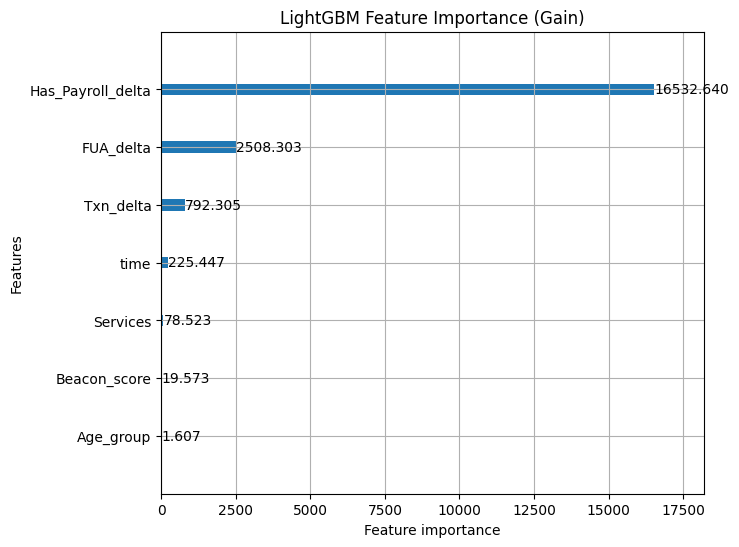

In [ ]:
# compute feature importance
# importance = gbm.feature_importance()
# feature_names = gbm.feature_name()

# df_importance = pd.DataFrame({'feature_names': feature_names, 'importance': importance})
# df_importance = df_importance.sort_values(by='importance', ascending=False)
# display(df_importance)

lgb.plot_importance(gbm, importance_type="gain", figsize=(7,6), title="LightGBM Feature Importance (Gain)")
plt.show()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 532.9/532.9 kB 11.2 MB/s eta 0:00:00


ExactExplainer explainer: 1001it [00:42, 21.94it/s]                         


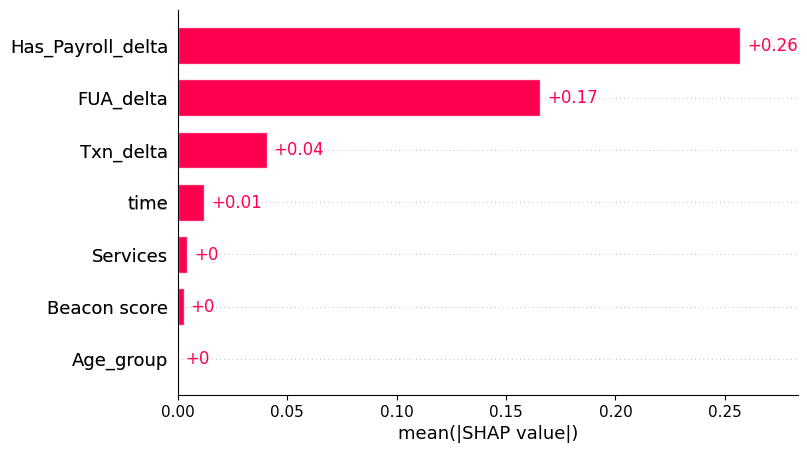

In [ ]:
# Feature importance by SHAP values
# https://shap.readthedocs.io/en/latest/example_notebooks/overviews/An%20introduction%20to%20explainable%20AI%20with%20Shapley%20values.html
# https://christophm.github.io/interpretable-ml-book/shap.html
!pip install shap
import shap

np.random.seed(42)
random_idx = np.random.choice(X_train.shape[0], 1000, replace=False)
X_sample = X_train.iloc[random_idx].reset_index(drop=True)
y_sample = y_train.iloc[random_idx].reset_index(drop=True)

explainer = shap.Explainer(gbm.predict, X_sample)
shap_values_gbm = explainer(X_sample)

# shap.summary_plot(shap_values_gbm, X_sample)
shap.plots.bar(shap_values_gbm)
# shap.plots.bar(shap_values_gbm.abs.max(0))

In [ ]:
# partial dependence plot
pd_cols = ['Has_Payroll_delta', 'Txn_delta', 'FUA_delta', 'Age_group']

# for col in pd_cols:
#     shap.partial_dependence_plot(
#         col,
#         gbm.predict,
#         X_sample,
#         model_expected_value=True,
#         feature_expected_value=True,
#         show=False,
#         ice=False,
#         # shap_values=shap_values[sample_ind : sample_ind + 1, :],
#     )
#     plt.title(col)
#     plt.show()
    # shap.plots.scatter(shap_values_gbm[:, col], )
# for col in pd_cols:


In [ ]:
# save the trained gbm
import pickle

# with open('/projects/cmpt889/uc3/sonny/B02_gbm3.pkl', 'wb') as f:
#     pickle.dump(gbm, f)

with open("/content/drive/MyDrive/shared/UseCase_3/sonny/B02_gbm3.pkl", 'wb') as f:
    pickle.dump(gbm, f)

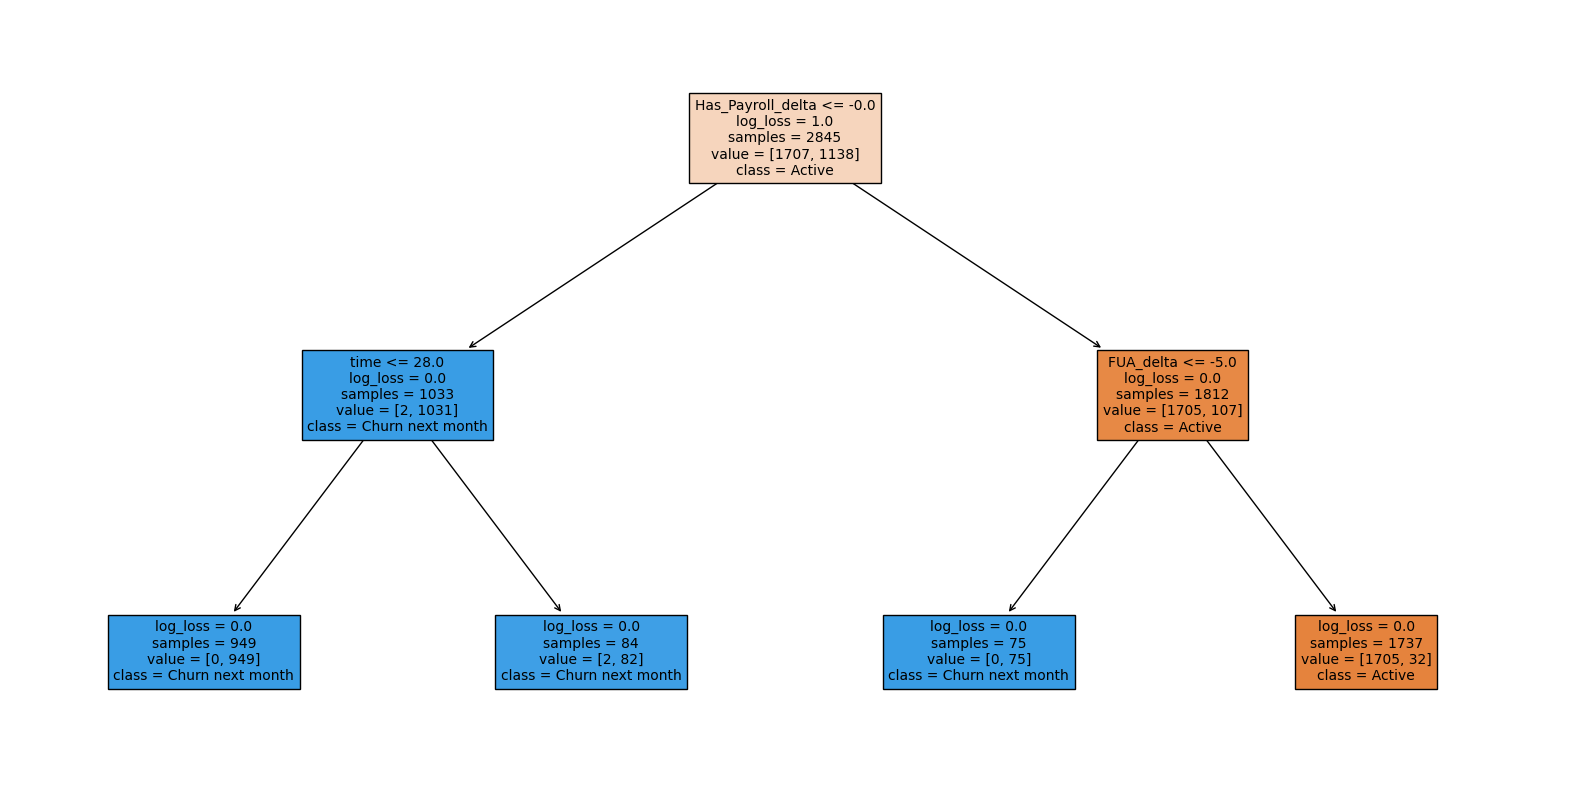

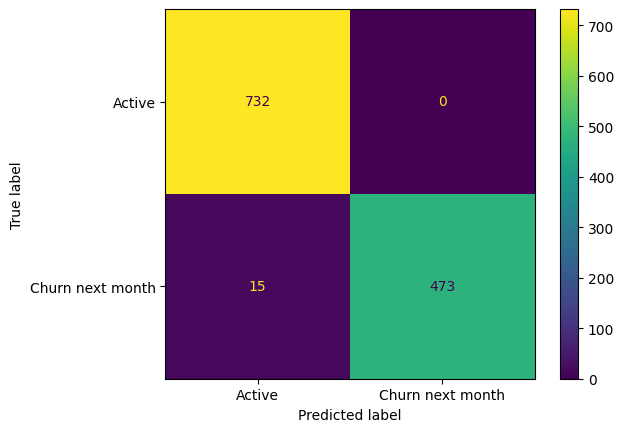

F1 score: 0.9843912591050988
Recall: 0.9692622950819673
Precision: 1.0


In [ ]:
# Fit decision tree classifier

from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth=2, random_state=42, criterion='log_loss', min_samples_leaf=20)
dt.fit(X_train, y_train)

# plot the decision tree
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 10))
plot_tree(dt, filled=True, feature_names=X_train.columns, class_names=['Active','Churn next month'], precision=0, fontsize=10)
plt.show()

# create confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

labels = [0, 1]
y_pred = dt.predict(X_test)
cm = confusion_matrix(y_test, y_pred, labels = labels)
# cm

cmd = ConfusionMatrixDisplay(cm, display_labels=['Active','Churn next month'])
cmd.plot()
plt.show()

# calculate the F1 score, recall, and precision
y_pred = dt.predict(X_test)

f1 = f1_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)

print(f'F1 score: {f1}')         # 2 * (Precision * Recall) / (Precision + Recall)
print(f'Recall: {recall}')       # True positive / All actual positive = True positive / (True positive + False negative)
print(f'Precision: {precision}') # True positive / All predicted positives = True positive / (True positive + False positive)